## Visualize

In [28]:
from functools import partial

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [2]:
from datasets import MP3dDataset
from trainer import PanoDPT

In [3]:
to_gpu = lambda z: z.to('cuda', torch.float16)

In [29]:
def to_dmap_gen(z, max_val, min_val, idxs):
    z[idxs] = max_val
    z = (z - min_val) / (max_val - min_val)
    return z

In [5]:
model = PanoDPT.load_from_checkpoint('lightning_logs/version_8/checkpoints/epoch=59-step=117479.ckpt')
model = to_gpu(model).eval()

In [39]:
ds = MP3dDataset('val', 288)

In [40]:
idx = 39
x, gt = map(lambda z: z.unsqueeze(0), ds[idx])
x, gt = map(to_gpu, (x, gt))
pred = model(x)

In [41]:
pred, gt = map(lambda z: z.detach().squeeze(0), (pred, gt))
to_dmap = partial(to_dmap_gen, max_val=gt.max(), min_val=gt.min(), idxs=(gt == 0.0))
pred, gt = map(to_dmap, (pred, gt))

In [42]:
img_grid = torch.cat([pred, gt], dim=0)
img_grid = img_grid.to('cpu', torch.float32)

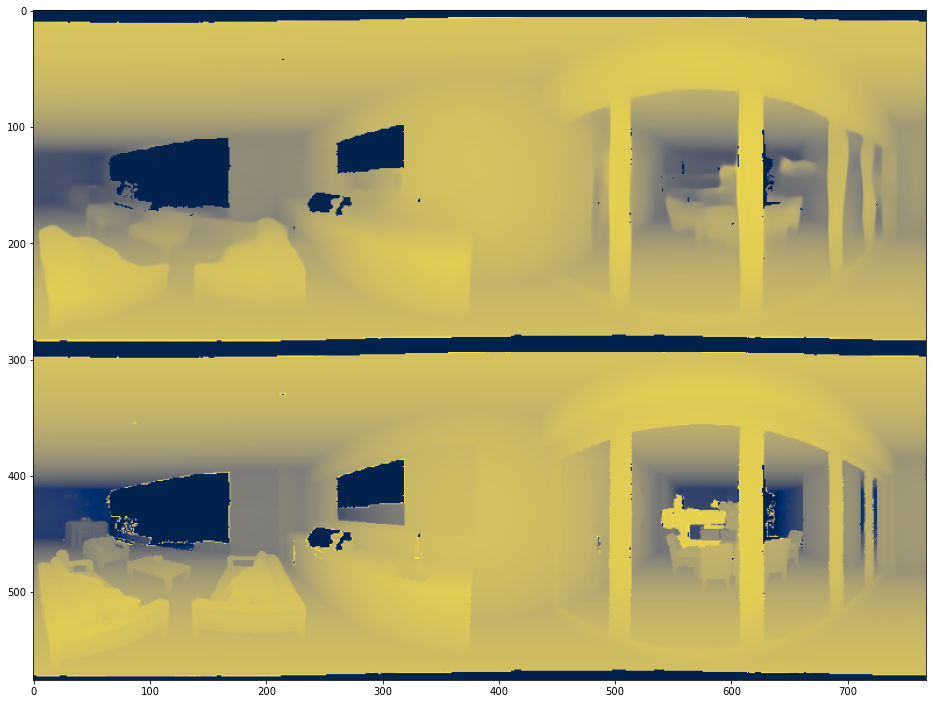

In [43]:
fig, ax = plt.subplots(figsize=[16, 32])
ax.imshow(img_grid, cmap='cividis_r')
fig.show()